# Análise de discursos de posse Lula (2022) e Bolsonaro (2013)

###

## Importando as ferramentas necessárias para o PLN

###### PLN: Processamento de linguagem natual.

In [23]:
import nltk
from nltk import tokenize
from nltk import FreqDist
from wordcloud import WordCloud
import string
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from unidecode import unidecode
import dataframe_image as dfi
import re


In [2]:
# O código abaixo é rodado apenas uma vez para baixar complementos da bibliotecla nltk para realizar o processamento
#nltk.download()

## Captando o arquivo txt do computador

In [3]:
discurso = open('discurso-lula-parlatorio.txt', mode='r', encoding='utf-8').read().lower()
discurso = unidecode(discurso.replace('\n', ' '))

## Tokenização

##### "Tokenizar" significa isolar as palavras de uma forma que o algoritmo consiga fazer uma leitura mais precisa. 
##### Abaixo retirarei toda a portuação do texto. Lembrando que no código anterior transformei todas as palavras em minúsculas e convertir os parágrafos em simples espaços entre palavras.
##### Na célula posterior farei o processo de tokenização. Abaixo da célula será possível ver o que ocorreu ao nosso texto.


In [4]:
# Removendo pontuação
discurso_sem_pontuacao = ''.join([palavra for palavra in discurso if palavra not in string.punctuation])


In [19]:
# Isolando cada palavra
separar_palavras = tokenize.word_tokenize(discurso_sem_pontuacao, language='portuguese')
separar_palavras

['quero',
 'comecar',
 'fazendo',
 'uma',
 'saudacao',
 'especial',
 'a',
 'cada',
 'um',
 'e',
 'a',
 'cada',
 'uma',
 'de',
 'voces',
 'uma',
 'forma',
 'de',
 'lembrar',
 'e',
 'retribuir',
 'o',
 'carinho',
 'e',
 'a',
 'forca',
 'que',
 'recebia',
 'todos',
 'os',
 'dias',
 'do',
 'povo',
 'brasileiro',
 'representado',
 'pela',
 'vigilia',
 'lula',
 'livre',
 'num',
 'dos',
 'momentos',
 'mais',
 'dificeis',
 'da',
 'minha',
 'vida',
 'hoje',
 'neste',
 'que',
 'e',
 'um',
 'dos',
 'dias',
 'mais',
 'felizes',
 'da',
 'minha',
 'vida',
 'a',
 'saudacao',
 'que',
 'eu',
 'faco',
 'a',
 'voces',
 'nao',
 'poderia',
 'ser',
 'outra',
 'tao',
 'singela',
 'e',
 'ao',
 'mesmo',
 'tempo',
 'tao',
 'cheia',
 'de',
 'significado',
 'boa',
 'tarde',
 'povo',
 'brasileiro',
 'minha',
 'gratidao',
 'a',
 'voces',
 'que',
 'enfrentaram',
 'a',
 'violencia',
 'politica',
 'antes',
 'durante',
 'e',
 'depois',
 'da',
 'campanha',
 'eleitoral',
 'que',
 'ocuparam',
 'as',
 'redes',
 'sociais',


## Stopwords

##### Stopwords são palavras que se retiradas não alterarão o sentido sintático das frases. 
##### A ferramenta nltk possui uma lista de stopwords em português, abaixo a importarei.

In [6]:
# Removendo palavras que se removidas não alteram o sentido das frases
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
palavras_sem_stop = [palavra for palavra in separar_palavras if palavra not in stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\caim_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Antes de retirar as stopwords do texto, vamos ver as 30 palavras que ocorrem com mais frequência no discurso:

In [7]:
freq = FreqDist(palavras_sem_stop)
freq = freq.most_common(30)
freq

[('nao', 26),
 ('pais', 26),
 ('brasil', 23),
 ('todos', 22),
 ('povo', 21),
 ('desigualdade', 19),
 ('brasileiro', 16),
 ('anos', 12),
 ('cada', 11),
 ('tempo', 10),
 ('brasileiros', 10),
 ('brasileiras', 9),
 ('fome', 9),
 ('todas', 8),
 ('hoje', 7),
 ('deste', 7),
 ('milhoes', 7),
 ('cuidar', 7),
 ('sempre', 7),
 ('quero', 6),
 ('voces', 6),
 ('apenas', 6),
 ('ninguem', 6),
 ('hora', 6),
 ('compromisso', 6),
 ('saude', 6),
 ('contra', 6),
 ('ano', 6),
 ('sao', 6),
 ('governo', 6)]

##### Adicionei mais algumas palavras à lista de stopwords pois não serão necessárias na análise.

In [8]:
# adicionando mais alguns filtros
stopwords.extend(['nacional', 'brasil', 'senhoras', 'senhores', '-', 
'todos', 'todas', 'governo', 'brasileiro', 'brasileira',
'brasileiros', 'brasileiras', 'pais', 'política', 'nao'])

##### Evidenciarei abaixo da próxima célula as 30 palavras que mais ocorrem no discurso mas dessa vez já sem as stopwords

In [9]:
palavras_sem_stop = [palavra for palavra in separar_palavras if palavra not in stopwords]
freq = FreqDist(palavras_sem_stop)
top30 = freq.most_common(30)

top30

[('povo', 21),
 ('desigualdade', 19),
 ('anos', 12),
 ('cada', 11),
 ('tempo', 10),
 ('fome', 9),
 ('hoje', 7),
 ('deste', 7),
 ('milhoes', 7),
 ('cuidar', 7),
 ('sempre', 7),
 ('quero', 6),
 ('voces', 6),
 ('apenas', 6),
 ('ninguem', 6),
 ('hora', 6),
 ('compromisso', 6),
 ('saude', 6),
 ('contra', 6),
 ('ano', 6),
 ('sao', 6),
 ('vida', 5),
 ('unico', 5),
 ('esperanca', 5),
 ('futuro', 5),
 ('amigos', 5),
 ('grande', 5),
 ('nunca', 5),
 ('ainda', 5),
 ('tudo', 5)]

##### Criarei uma "nuvem" de palavras para uma melhor visualização

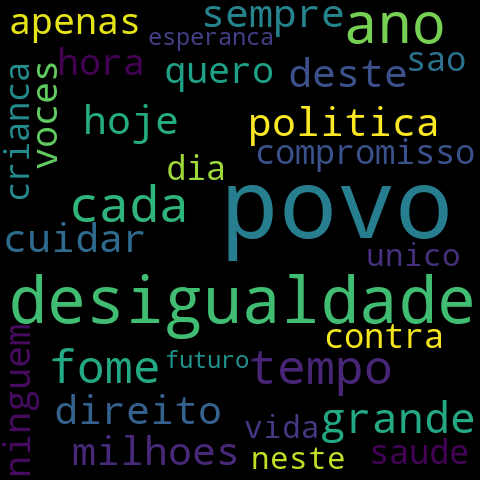

In [10]:
nuvem_de_palavras = WordCloud(stopwords=stopwords,
                              height=480,
                              width=480,
                              max_words=30)
nuvem_de_palavras.generate(discurso_sem_pontuacao)
nuvem_de_palavras.to_file('nuvem.png')
Image.open('nuvem.png')

##### Também plotarei um gráfico de frequência.

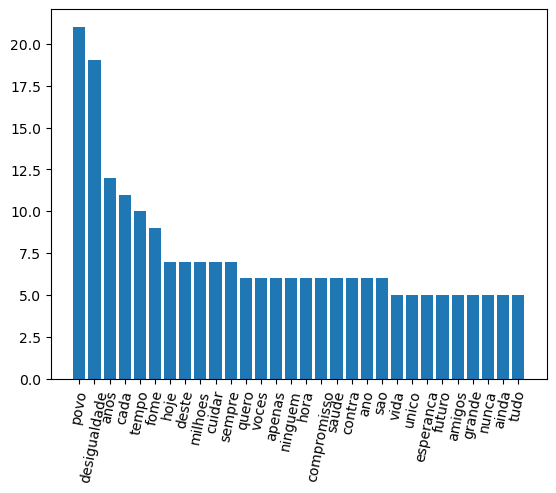

In [11]:
top30 = dict(top30)
df = pd.DataFrame.from_dict(top30.items())
df = df.rename(columns={0:'Palavras', 1:'Repetições'})

plt.bar(df['Palavras'], df['Repetições'])
plt.xticks(rotation=79)
plt.savefig('plot_frequencia.png')
plt.show()



## Investigar frequencia de palavras específicas

In [12]:
# Passarei uma lista de palavras específicas para ver a quantidade de vezes que foi citada:
analise_palavras = [
    'ambiente',
    'natureza', 
    'fome', 
    'amazonia',
    'educacao',
    'saude',
    'orcamento' 
]


freq = dict(freq)


for palavra in analise_palavras:
    try:
        if freq[palavra]:
            print(f'{palavra}: {freq[palavra]}')
    except:
        print(f'{palavra}: 0')

ambiente: 0
natureza: 1
fome: 9
amazonia: 2
educacao: 4
saude: 6
orcamento: 1


## Stemização

##### Daqui pra baixo tento fazer a captação de palavras a partir de uma parte da palavra.

In [18]:
analise_palavras = [
    'desig',
    'ambient',
    'natur', 
    'amazoni',
    'educa',
    'democra' 
]

contagem_com_radicais = {}
for palavra in analise_palavras:  
    if palavra in discurso_sem_pontuacao:
        contagem_com_radicais[palavra] = discurso_sem_pontuacao.count(palavra)
    else:
        contagem_com_radicais[palavra] = 0


df = pd.DataFrame(contagem_com_radicais.items(), columns=['    Radical', '    Frequência'])
df = df.sort_values(by=['    Frequência'], ascending=False).style.hide(axis='index')
dfi.export(df, 'frequencia_radicais.png', table_conversion='matplotlib')
df


Radical,Frequência
desig,21
democra,10
educa,4
amazoni,2
natur,1
ambient,0


### Análise léxica

In [32]:
texto = 'Oi, meu nome é Caio.'
re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", texto)

['Oi', ',', 'meu', 'nome', 'é', 'Caio', '.']

In [33]:
lista = [1, 2, 3]
lista.remove(1)
lista

[2, 3]